## **Implementación de Python de programación lineal para productos**

En esta implementación se usará el paquete para resolver el problema de programación lineal SciPy. 

**SciPy** es un paquete de propósito general para computación cientiífica con Python.

Para definir y resolver problemas de optimización con SciPy, necesita importar scipy.optimize.linprog():


In [1]:
from scipy.optimize import linprog

In [2]:
!pip install pytholog
# to Pip install Add --no-cache-dir parameter before intsall 
!pip --no-cache-dir install

ERROR: You must give at least one requirement to install (see "pip help install")


In [3]:
import pytholog as pl 


In [4]:
import numpy as np
import pandas as pd
import math


In [5]:
dictProducts = {}
dictSales = {}
listaU = []
listaC = []
listaCoAlm = []
listaAmo = []
listaNam = []

df_new = pd.DataFrame.from_dict(dictProducts, orient='index') 
ventas = pd.DataFrame.from_dict(dictSales, orient='index')


Ahora que ha linprog() esta importado, podemos comenzar a optimizar.

In [6]:
def agregarProducto(name, gain, cost, AlmCost, amount):
  dictProducts[name] = {"ganancia" : gain, 
                          "costo" : cost, 
                          "utilidad" : gain - cost,
                          "costo_almacenamiento": AlmCost,
                        "cantidad": amount
                          }

In [7]:
agregarProducto("papas", 1000, 600, 0, 70)
agregarProducto("cheetos", 1200, 500, 0, 50)
agregarProducto("chicles", 1500, 800, 0, 50)
agregarProducto("gol", 1100, 500, 0, 35)
agregarProducto("ponky", 700, 300, 0, 31)
agregarProducto("salsa de tomate", 100, 20, 0, 5)
print(dictProducts)

{'papas': {'ganancia': 1000, 'costo': 600, 'utilidad': 400, 'costo_almacenamiento': 0, 'cantidad': 70}, 'cheetos': {'ganancia': 1200, 'costo': 500, 'utilidad': 700, 'costo_almacenamiento': 0, 'cantidad': 50}, 'chicles': {'ganancia': 1500, 'costo': 800, 'utilidad': 700, 'costo_almacenamiento': 0, 'cantidad': 50}, 'gol': {'ganancia': 1100, 'costo': 500, 'utilidad': 600, 'costo_almacenamiento': 0, 'cantidad': 35}, 'ponky': {'ganancia': 700, 'costo': 300, 'utilidad': 400, 'costo_almacenamiento': 0, 'cantidad': 31}, 'salsa de tomate': {'ganancia': 100, 'costo': 20, 'utilidad': 80, 'costo_almacenamiento': 0, 'cantidad': 5}}


Funciones para crear lista de atributos de diccionario

In [8]:
def listName(data):
  list = []
  for key, value in data.items():
    temp = key
    list.append(temp)
  return list

Crear lista de utilidad

In [9]:
def listUti(data):
  list = []
  for key, value in data.items():
    temp = value["utilidad"]
    list.append(temp)
  return list

Crear lista de costos

In [10]:
def listCost(data):
  list = []
  for key, value in data.items():
    temp = value["costo"]
    list.append(temp)
  return list

Crear lista de costos de almacenamiento de productos

In [11]:
def listCostAlm(data):
  list = []
  for key, value in data.items():
    temp = value["costo_almacenamiento"]
    list.append(temp)
  return list

Crear lista de cantidad

In [12]:
def listAmount(data):
  list = []
  for key, value in data.items():
    temp = value["cantidad"]
    list.append(temp)
  return list

Lista de atributos de cada producto

In [13]:
listaU = listUti(dictProducts)
listaC = listCost(dictProducts)
listaCoAlm = listCostAlm(dictProducts)
listaAmo = listAmount(dictProducts)
listaNam = listName(dictProducts)

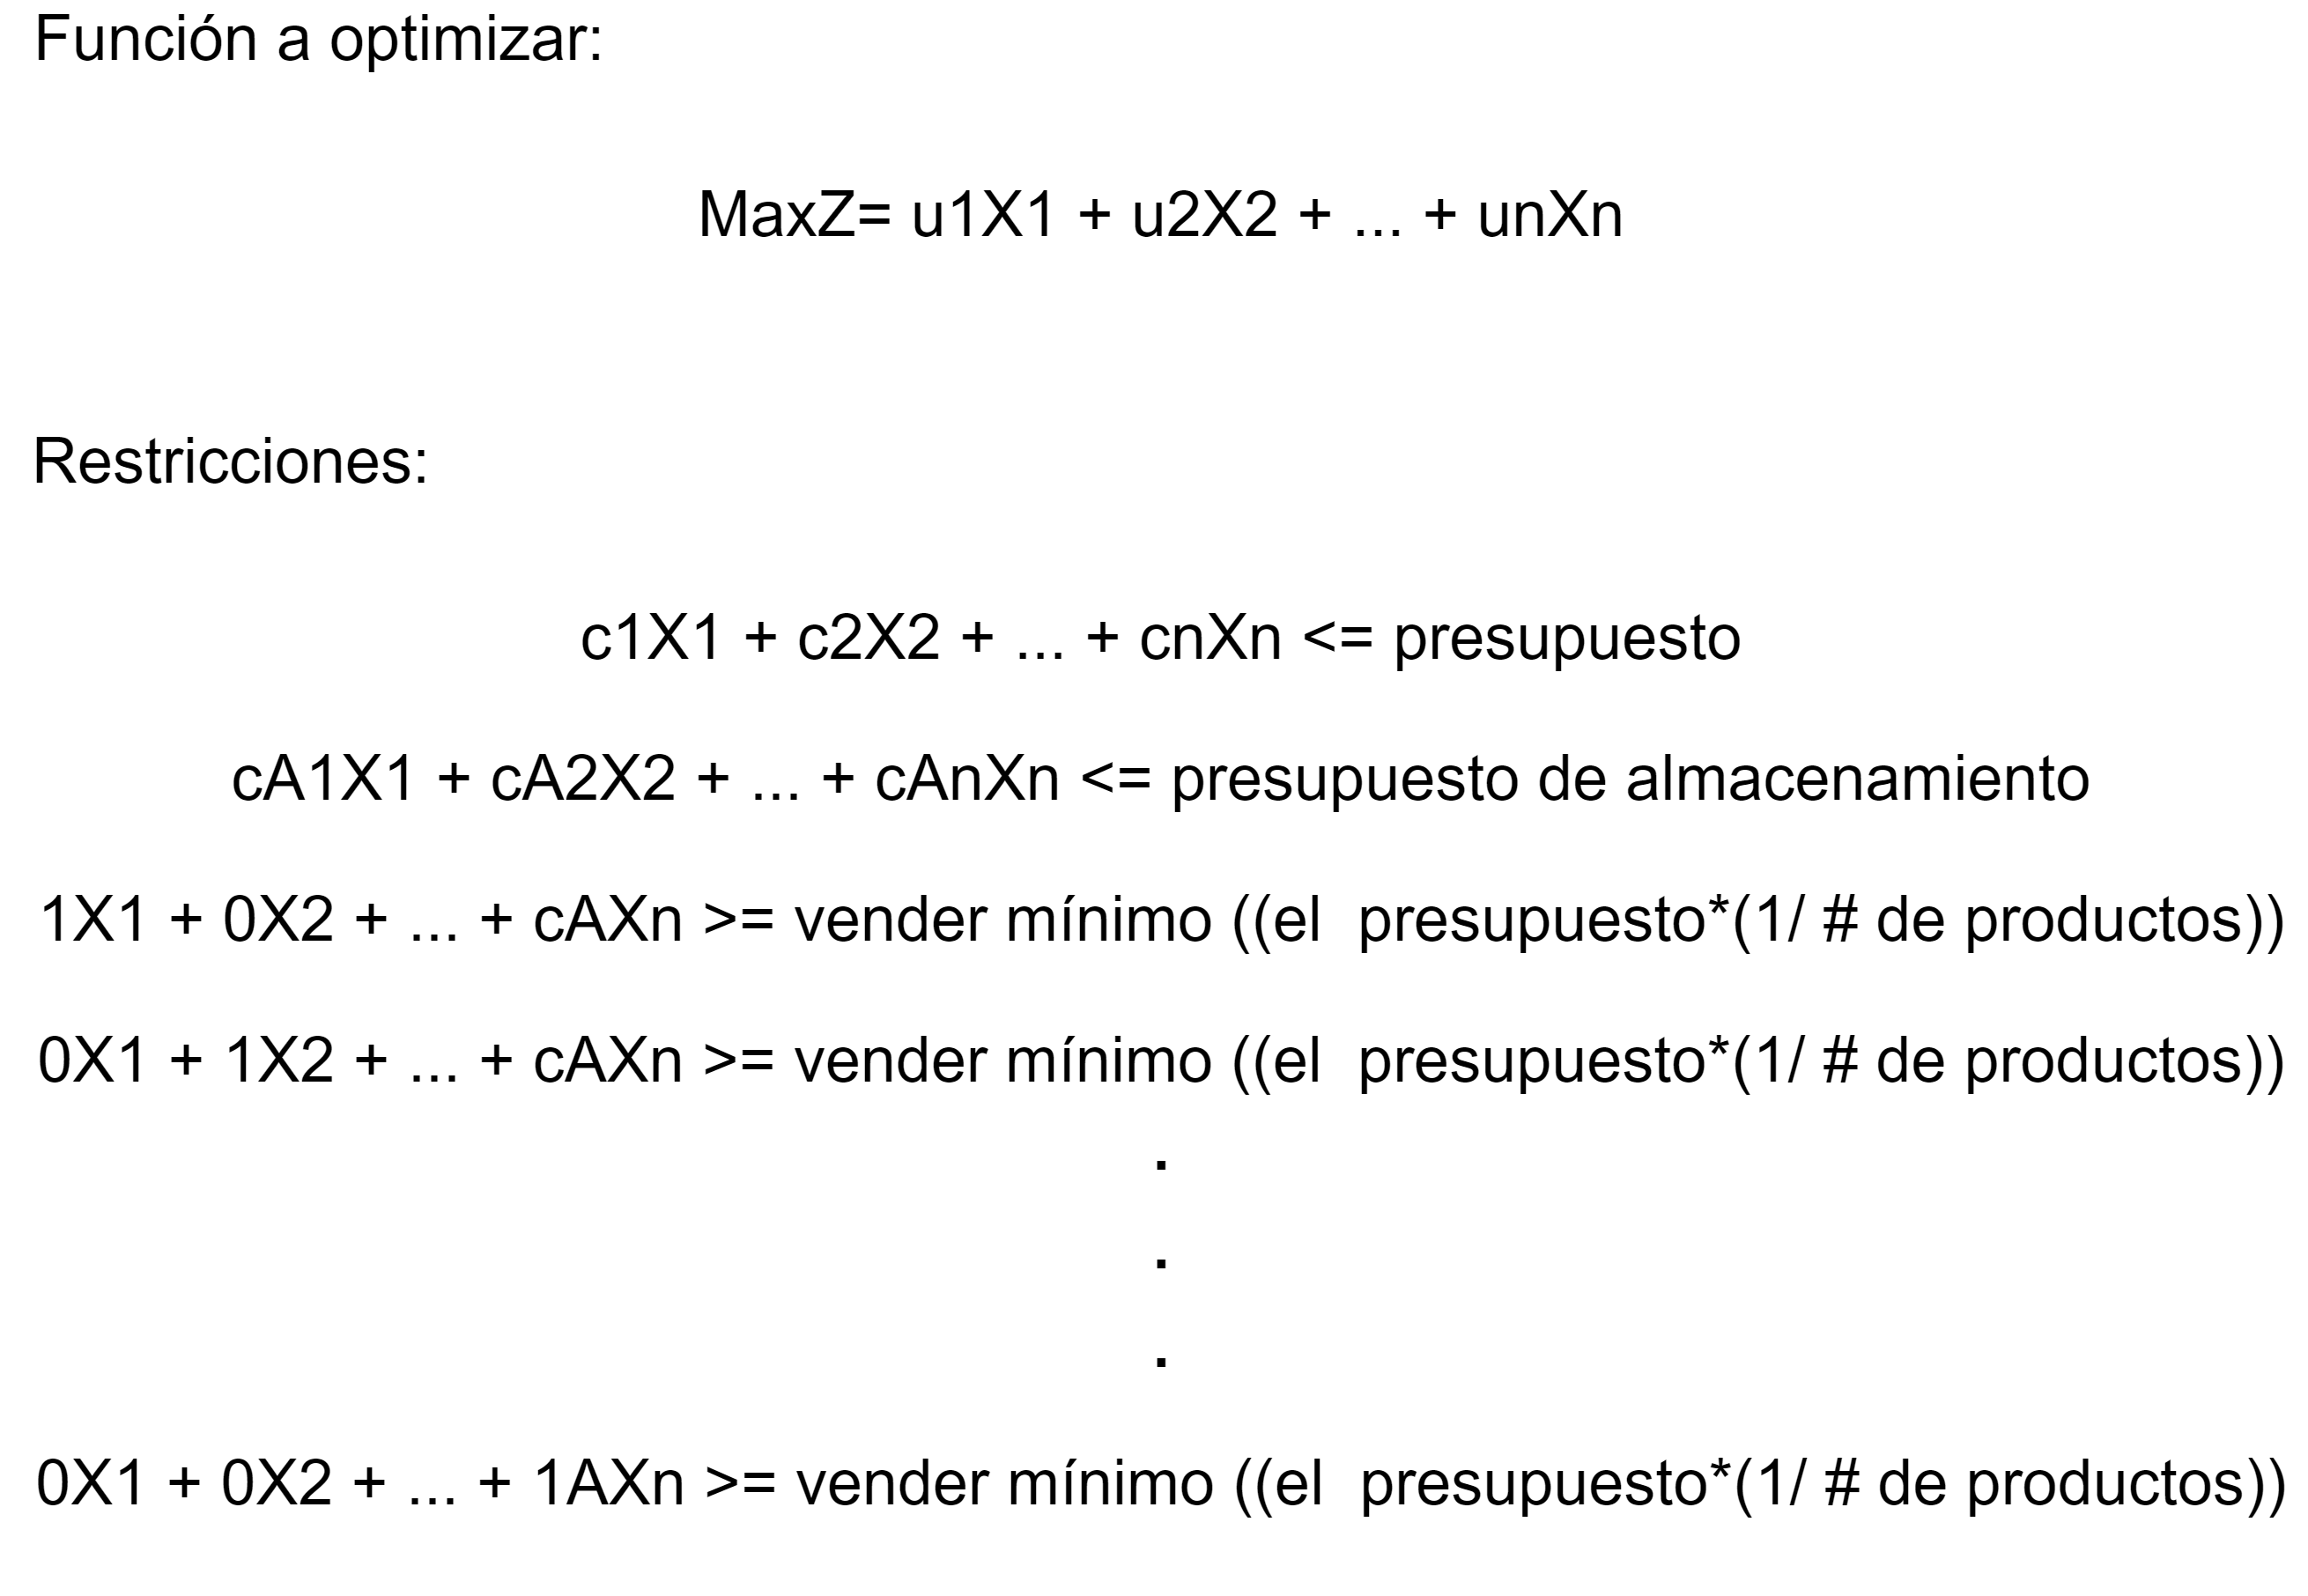
Como linprog()resuelve solo problemas de minimización (no maximización) y no permite restricciones de desigualdad con el signo mayor o igual que (≥). Para solucionar estos problemas, debemos modificar el problema cambiando la desigualdad si es necesario:

In [14]:
def optimo3(presupuesto, presupuestoAl, listaUti, listaCost, listaCostAl):
  
  #Lista xi, funcion objetivo
  
  obj = []
  for i in listaUti:
   temp = -1 * i 
   obj.append(temp) 
  
  
  #Definicion de variable en 0
  restrxi = []
  for i in range(len(listaUti)):
    restrxi.append(0)

  lhs_ineq = []
  

  lhs_ineq.append(listaCost)           #Restriccion de costo
  lhs_ineq.append(listaCostAl)         #Restriccion de Costo de almacenamiento

  for i in range(len(listaUti)):    # Restricciones de margen de utildiad utilidad neta
    #restrxi[i] = ((listaUti[i])/(listaUti[i]+ listaCost[i]))*100*-1
    restrxi[i] = -1
    lhs_ineq.append(restrxi[:])
    restrxi[i] = 0
  
  
  # Restriccion lado derecho <= 
  rhs_ineq = []            
  rhs_ineq.append(presupuesto)      #Restriccion de presupuesto            
  rhs_ineq.append(presupuestoAl)    #Restriccion de Presupuesto de almacenamiento

  for i in range(len(listaUti)):    #Restriccion de %utilidad neta de un prodcuto
    #rhs_ineq.append(0.2)
    rhs_ineq.append(-1*((presupuesto*(1/len(listaUti)))/listaCost[i]))
  
  bnd = []                         #Restriccion de limite de variables
  for i in range(len(listaUti)):
    bnd.append((0, float("inf")))
 

  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=None, b_eq=None, bounds=bnd,
              method="simplex") 

  return opt

Probando el problema de programación lineal:



In [15]:

PresupuestoProducto = 10000
PresupuestoAlmacenamiento = 2000
optimo3(PresupuestoProducto, PresupuestoAlmacenamiento, listaU, listaC, listaCoAlm)

     con: array([], dtype=float64)
     fun: -15791.666666666673
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.00000000e+00, 2.00000000e+03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.52651283e-14])
  status: 0
 success: True
       x: array([ 2.77777778,  3.33333333,  2.08333333,  3.33333333,  5.55555556,
       83.33333333])

## **Implementación con prolog para una base de conocimientos**

En esta implementación se usará el paquete para resolver el problema de manejo de inventario con pytholog.

Es una biblioteca de Python que permite usar la programación lógica en Python. El objetivo de la biblioteca es explorar formas de utilizar el razonamiento simbólico con el aprendizaje automático.

Para empezar lo primero que hacemos es definir nuestra base de conocimiento


In [16]:
def baseConocimiento(query):
  
  listaAm = listAmount(dictProducts)
  listaNa = listName(dictProducts)

  inventary_kb = pl.KnowledgeBase("products")
  facts = []

  #lista de productos y cantidad
  for i,j in zip(listaNa, listaAm):
    facts.append("hay("+str(i)+","+str(j)+")")
  
  
  listTempSum = []
  #sales
  for key, i in zip(dictSales.keys(), range(len(dictSales.keys()))):
    temp = list(dictSales.values())[i].keys()
    sum = 0
    for key2,value in list(dictSales.values())[i].items() :
     facts.append("vende(" + str(key) + "," + str(key2) + "," + str(value) +")")
     sum += value
    listTempSum.append("recompensa(" + str(key) + "," + str(sum) +")")
  
  
  for i in listTempSum:
    facts.append(str(i))
  
  
  #seller
  for key in dictSales.keys():
    facts.append("vendedor(" + str(key) + ")")
  
  
  #rules
  facts.append("hayProducto(X, Truth) :- hay(X, Y), Truth is Y > 0")
  facts.append("alertaProducto(X, Truth) :- hay(X, Y), Truth is Y < 50")
  facts.append("faltaProducto(X, Truth) :- hay(X, Y), Truth is Y  < 1")
  facts.append("vendio(X,Y,Z) :- vende(X,Y,Z), vendedor(X)")
  facts.append("premiarVendedor(X, Truth) :- vendedor(X), recompensa(X,Y), Truth is Y >= 15")
  facts.append("castigarVendedor(X, Truth) :- recompensa(X,Y), vendedor(X), Truth is Y <= 5 ")

  #prolog
  
  inventary_kb(facts)
  #query
  #print(facts)
  #print(inventary_kb.query(pl.Expr("alertaProducto(salsa de tomate)")))
  #print(inventary_kb.query(pl.Expr("vendio(tomas, papas, X)")))
  #print(inventary_kb.query(pl.Expr("premiarVendedor(X)")))
  #print(inventary_kb.query(pl.Expr("castigarVendedor(X)")))
  return inventary_kb.query(pl.Expr(query))
print(dictProducts)


print(baseConocimiento("alertaProducto( salsadetomate, Truth )")[0].get('Truth'))

{'papas': {'ganancia': 1000, 'costo': 600, 'utilidad': 400, 'costo_almacenamiento': 0, 'cantidad': 70}, 'cheetos': {'ganancia': 1200, 'costo': 500, 'utilidad': 700, 'costo_almacenamiento': 0, 'cantidad': 50}, 'chicles': {'ganancia': 1500, 'costo': 800, 'utilidad': 700, 'costo_almacenamiento': 0, 'cantidad': 50}, 'gol': {'ganancia': 1100, 'costo': 500, 'utilidad': 600, 'costo_almacenamiento': 0, 'cantidad': 35}, 'ponky': {'ganancia': 700, 'costo': 300, 'utilidad': 400, 'costo_almacenamiento': 0, 'cantidad': 31}, 'salsa de tomate': {'ganancia': 100, 'costo': 20, 'utilidad': 80, 'costo_almacenamiento': 0, 'cantidad': 5}}
Yes


In [17]:
def addSeller(name):
  name = name.lower()
  if dictSales.get(name) == None:
    dictSales[name] = {}
  else: 
    print("Vendedor " + name +  " ya registrado")

Se encarga de la venta de un producto y actualiza el diccionario

In [18]:
def ventaProducto(seller, product, quantity, data):

  seller = seller.lower()
  product = product.lower()
  
  #verifica si el vendedor existe
  if dictSales.get(seller) == None:
    print("Vendedor" + seller + " no encontrado, agrega este vendedor con addSeller(" + seller + ")")

  #Agrega la cantidad de producto vendio en una diccionario si existe el producto
  elif dictSales.get(seller).get(product) != None and (dictProducts.get(product).get("cantidad") - quantity) >= 0:
    dictSales[seller][product] = dictSales.get(seller).get(product) + quantity
    if baseConocimiento("alertaProducto("+ product +", Truth )")[0].get('Truth') == 'Yes':
      dictSales['alertaproducto'][product] = int(dictSales.get('alertaproducto').get(product) or 0) + 1
      #dictSales[seller]['AlertaProducto'] = dictSales.get(seller).get('AlertaProducto') + 1
      
      


  #Agrega la cantidad de producto vendio en una diccionario sino existe el producto
  elif dictSales.get(seller) != None:
      
      temp = quantity
      dictSales[seller][product] = temp
      if baseConocimiento("alertaProducto("+ product +", Truth )")[0].get('Truth') == 'Yes':
        dictSales['alertaproducto'][product] = int(dictSales.get('alertaproducto').get(product) or 0) + 1
  
  #print(dictSales)
  #print(baseConocimiento("alertaProducto("+ product +", Truth )")[0].get('Truth'))
  #print(product)
  #Actualiza la cantidad de productos segun los vendidos 
  if (dictProducts.get(product).get("cantidad") - quantity) >= 0:
    dictProducts[product]["cantidad"] = dictProducts.get(product).get("cantidad") - quantity
  else: 
    print("No es posible realizar la venta de " + str(product))
  print("Unidades de " + str(product) + ": " + str(dictProducts.get(product).get("cantidad")))

Actualiza el diccionario con la compra de un producto

In [19]:
def compraProducto(product, quantity, data):
  
  #Actualiza el diccionario
  data[product]["cantidad"] = data.get(product).get("cantidad") + quantity

Pruebas

In [20]:
addSeller("alertaproducto")
addSeller("tomas")
addSeller("juan")
addSeller("pedro")
addSeller("alberto")
addSeller("tulio")
#compraProducto("papas", 4, )

In [21]:
print(dictProducts)
print(dictSales)

{'papas': {'ganancia': 1000, 'costo': 600, 'utilidad': 400, 'costo_almacenamiento': 0, 'cantidad': 70}, 'cheetos': {'ganancia': 1200, 'costo': 500, 'utilidad': 700, 'costo_almacenamiento': 0, 'cantidad': 50}, 'chicles': {'ganancia': 1500, 'costo': 800, 'utilidad': 700, 'costo_almacenamiento': 0, 'cantidad': 50}, 'gol': {'ganancia': 1100, 'costo': 500, 'utilidad': 600, 'costo_almacenamiento': 0, 'cantidad': 35}, 'ponky': {'ganancia': 700, 'costo': 300, 'utilidad': 400, 'costo_almacenamiento': 0, 'cantidad': 31}, 'salsa de tomate': {'ganancia': 100, 'costo': 20, 'utilidad': 80, 'costo_almacenamiento': 0, 'cantidad': 5}}
{'alertaproducto': {}, 'tomas': {}, 'juan': {}, 'pedro': {}, 'alberto': {}, 'tulio': {}}


In [22]:

ventaProducto("tomas","papas",10,dictProducts)
ventaProducto("tomas","cheetos",5,dictProducts)
ventaProducto("tomas","papas",3,dictProducts)
ventaProducto("tomas","ponky",4,dictProducts)

ventaProducto("juan","papas",10,dictProducts)
ventaProducto("juan","cheetos",5,dictProducts)
ventaProducto("juan","papas",3,dictProducts)
ventaProducto("juan","ponky",4,dictProducts)

ventaProducto("pedro","papas",10,dictProducts)
ventaProducto("pedro","cheetos",5,dictProducts)
ventaProducto("pedro","papas",3,dictProducts)
ventaProducto("pedro","ponky",4,dictProducts)

ventaProducto("alberto","papas",10,dictProducts)
ventaProducto("alberto","cheetos",5,dictProducts)
ventaProducto("alberto","papas",3,dictProducts)
ventaProducto("alberto","ponky",4,dictProducts)

ventaProducto("tulio","papas",1,dictProducts)
ventaProducto("tulio","cheetos",0,dictProducts)
ventaProducto("tulio","papas",0,dictProducts)
ventaProducto("tulio","ponky",0,dictProducts)
ventaProducto("tulio","salsa de tomate",1,dictProducts)

Unidades de papas: 60
Unidades de cheetos: 45
Unidades de papas: 57
Unidades de ponky: 27
Unidades de papas: 47
Unidades de cheetos: 40
Unidades de papas: 44
Unidades de ponky: 23
Unidades de papas: 34
Unidades de cheetos: 35
Unidades de papas: 31
Unidades de ponky: 19
Unidades de papas: 21
Unidades de cheetos: 30
Unidades de papas: 18
Unidades de ponky: 15
Unidades de papas: 17
Unidades de cheetos: 30
Unidades de papas: 17
Unidades de ponky: 15
Unidades de salsa de tomate: 4


#**Bayes o otro.**  

In [23]:
ventas = pd.DataFrame.from_dict(dictSales, orient='index')
df_new = pd.DataFrame.from_dict(dictProducts, orient='index')

ventas = ventas.fillna(0)
df_new = df_new.fillna(0)


In [24]:
df_new['Costoso'] = np.where(df_new['costo'] >= 500 , 1, 0)
df_new['Alerta'] = np.where(df_new['cantidad'] <= 40 , 1, 0)


In [25]:
print(df_new)
print(ventas)
print(dictSales)
print(dictProducts)

                 ganancia  costo  utilidad  ...  cantidad  Costoso  Alerta
papas                1000    600       400  ...        17        1       1
cheetos              1200    500       700  ...        30        1       1
chicles              1500    800       700  ...        50        1       0
gol                  1100    500       600  ...        35        1       1
ponky                 700    300       400  ...        15        0       1
salsa de tomate       100     20        80  ...         4        0       1

[6 rows x 7 columns]
                ponky  cheetos  papas  salsa de tomate
alertaproducto      5        4      7              1.0
tomas               4        5     13              0.0
juan                4        5     13              0.0
pedro               4        5     13              0.0
alberto             4        5     13              0.0
tulio               0        0      1              1.0
{'alertaproducto': {'ponky': 5, 'cheetos': 4, 'papas': 7, 'salsa de 

In [26]:
 
def alertaProduct(product):
  #convertimos en lista las columnas de ventas y tiramos index
  productos = list(ventas.columns)
  index = productos[0]

  #calculamos la suma de las ventas
  ventasTotales = 0
  ventasProducto = 0
  sumVentasAlerta = 0
  sumAlerta = 0
  sumObj = 0
  for i in productos: 
    for a in range(len(ventas[index])-1):
      ventasTotales +=ventas[i][a+1]
  for i in ventas[product]:
    ventasProducto += i
  
  #hallamos el número de productos que estan alerta
  for i in df_new['Alerta']:
    if i == 1:
      sumAlerta +=1
  #probabilidad de vender un producto
  #pA
  pA = ventasProducto/ventasTotales
  #probabilidad de que un producto este en alerta
  #pB
  pB = sumAlerta/len(df_new['Alerta'])
  
  #p(AnB)
  for i in productos:
    sumVentasAlerta += ventas[i]['alertaproducto']

  pAnB= ventas[product]['alertaproducto'] / sumVentasAlerta
  print("pB = "+ str(pB*100))
  print("pAnB = " + str(pAnB*100))
  print("pAnB/pB = " +  str((pAnB/pB)*100))

  return (pAnB/pB)*100

alertaProduct('salsa de tomate')

pB = 83.33333333333334
pAnB = 5.88235294117647
pAnB/pB = 7.0588235294117645


7.0588235294117645

In [27]:
print(df_new)
print(ventas)
print(dictSales)

                 ganancia  costo  utilidad  ...  cantidad  Costoso  Alerta
papas                1000    600       400  ...        17        1       1
cheetos              1200    500       700  ...        30        1       1
chicles              1500    800       700  ...        50        1       0
gol                  1100    500       600  ...        35        1       1
ponky                 700    300       400  ...        15        0       1
salsa de tomate       100     20        80  ...         4        0       1

[6 rows x 7 columns]
                ponky  cheetos  papas  salsa de tomate
alertaproducto      5        4      7              1.0
tomas               4        5     13              0.0
juan                4        5     13              0.0
pedro               4        5     13              0.0
alberto             4        5     13              0.0
tulio               0        0      1              1.0
{'alertaproducto': {'ponky': 5, 'cheetos': 4, 'papas': 7, 'salsa de 

In [28]:
def calculo_prob_alerta():
  total_Alerta = 0
  ind = 0
  #calculamos la suma de las ventas
  ventasTotales = 0
  
  porcentaje_Alerta = 0
  porcentaje_No_Alerta = 0

  productos = list(ventas.columns)
  index = productos[0]
  for i in range(len(listaNam)):
    if df_new['Alerta'][listaNam[ind]] == 1 :
      
      total_Alerta += df_new['cantidad'][listaNam[ind]]
    ind += 1
  
  for i in range(len(listaNam)):
    ventasTotales += df_new['cantidad'][i]


  porcentaje_Alerta = total_Alerta/ventasTotales
  porcentaje_No_Alerta = 1-porcentaje_Alerta

  


  print("Porcentaje de alerta : ")
  print(porcentaje_Alerta)
  print("Porcentaje de No Alerta : ")
  print(porcentaje_No_Alerta)

  porcentaje_Alerta_Costoso = 0
  total_Alerta_Costoso = 0

  for i in range(len(listaNam)):
    if df_new['Costoso'][listaNam[i]] == 1 and df_new['Alerta'][listaNam[i]] == 1 :
      
      total_Alerta_Costoso += df_new['cantidad'][listaNam[i]]

  
  porcentaje_Alerta_Costoso = total_Alerta_Costoso/total_Alerta
  print("Porcentaje Alerta costoso : ")
  print(porcentaje_Alerta_Costoso)

  total_No_Alerta_Costoso = 0
  porcentaje_No_Alerta_Costoso = 0 
  for i in range(len(listaNam)):
    if df_new['Costoso'][listaNam[i]] == 1 and df_new['Alerta'][listaNam[i]] == 0 :
      
      total_No_Alerta_Costoso += df_new['cantidad'][listaNam[i]]
  

  porcentaje_No_Alerta_Costoso = total_No_Alerta_Costoso/(ventasTotales-total_Alerta)
  print("Porcentaje Alerta no costoso : ")
  print(porcentaje_No_Alerta_Costoso)

  #P(Alerta|Costoso) = (P(Costoso|Alerta) * P(Alerta))/ P(Costoso)
  compra_alerta_costoso =  (porcentaje_Alerta_Costoso * porcentaje_Alerta)/((porcentaje_Alerta * porcentaje_Alerta_Costoso) + (porcentaje_No_Alerta * porcentaje_No_Alerta_Costoso))
  print("Hay un "+ str(compra_alerta_costoso*100) +"% de posibilidad de que compren un prodcuto que este en alerta y sea costoso")
  
  
calculo_prob_alerta()

Porcentaje de alerta : 
0.6688741721854304
Porcentaje de No Alerta : 
0.33112582781456956
Porcentaje Alerta costoso : 
0.8118811881188119
Porcentaje Alerta no costoso : 
1.0
Hay un 62.121212121212125% de posibilidad de que compren un prodcuto que este en alerta y sea costoso


#Lenguaje por reforzamiento



In [29]:
temp = [["Mateo","papas",3],["Mateo","cheetos",2],["Mateo","gol",1]]
temp

[['Mateo', 'papas', 3], ['Mateo', 'cheetos', 2], ['Mateo', 'gol', 1]]

In [30]:
def ventaProductoList(listProducts):
  for i in listProducts:
    ventaProducto(i[0],i[1],i[2],dictProducts)

In [31]:


dataset = []
dataset

[]

In [32]:
def llamadaVenta(seller,product,quantity,data):
  dataset.append(product)
  for i,j in zip(product,quantity):
    ventaProducto(seller,i,j,data)

In [33]:
llamadaVenta("tulio",["papas","cheetos"],[4,5],dictProducts)
llamadaVenta("tulio",["papas","cheetos"],[2,4],dictProducts)
llamadaVenta("tulio",["gol"],[4],dictProducts)
llamadaVenta("tulio",["salsa de tomate"],[4],dictProducts)
llamadaVenta("tulio",["Ponky","salsa de tomate"],[4],dictProducts)
llamadaVenta("tulio",["cheetos","ponky"],[4],dictProducts)
llamadaVenta("tulio",["papas","chicle","gol"],[4],dictProducts)
llamadaVenta("tulio",["papas","cheetos","gol"],[4],dictProducts)
dataset

Unidades de papas: 13
Unidades de cheetos: 25
Unidades de papas: 11
Unidades de cheetos: 21
Unidades de gol: 31
Unidades de salsa de tomate: 0
Unidades de ponky: 11
Unidades de cheetos: 17
Unidades de papas: 7
Unidades de papas: 3


[['papas', 'cheetos'],
 ['papas', 'cheetos'],
 ['gol'],
 ['salsa de tomate'],
 ['Ponky', 'salsa de tomate'],
 ['cheetos', 'ponky'],
 ['papas', 'chicle', 'gol'],
 ['papas', 'cheetos', 'gol']]

In [34]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
te = TransactionEncoder()
te_array= te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)
print(df)

   Ponky  cheetos  chicle    gol  papas  ponky  salsa de tomate
0  False     True   False  False   True  False            False
1  False     True   False  False   True  False            False
2  False    False   False   True  False  False            False
3  False    False   False  False  False  False             True
4   True    False   False  False  False  False             True
5  False     True   False  False  False   True            False
6  False    False    True   True   True  False            False
7  False     True   False   True   True  False            False


In [36]:
frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets_ap)

    support                  itemsets
0     0.125                   (Ponky)
1     0.500                 (cheetos)
2     0.125                  (chicle)
3     0.375                     (gol)
4     0.500                   (papas)
5     0.125                   (ponky)
6     0.250         (salsa de tomate)
7     0.125  (salsa de tomate, Ponky)
8     0.125            (cheetos, gol)
9     0.375          (papas, cheetos)
10    0.125          (ponky, cheetos)
11    0.125             (chicle, gol)
12    0.125           (papas, chicle)
13    0.250              (papas, gol)
14    0.125     (papas, cheetos, gol)
15    0.125      (papas, chicle, gol)


In [37]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ponky),(salsa de tomate),0.125,0.250,0.125,1.0,4.000000,0.093750,inf
1,(ponky),(cheetos),0.125,0.500,0.125,1.0,2.000000,0.062500,inf
2,(chicle),(gol),0.125,0.375,0.125,1.0,2.666667,0.078125,inf
3,(chicle),(papas),0.125,0.500,0.125,1.0,2.000000,0.062500,inf
4,"(cheetos, gol)",(papas),0.125,0.500,0.125,1.0,2.000000,0.062500,inf
5,"(chicle, papas)",(gol),0.125,0.375,0.125,1.0,2.666667,0.078125,inf
6,"(chicle, gol)",(papas),0.125,0.500,0.125,1.0,2.000000,0.062500,inf
7,(chicle),"(papas, gol)",0.125,0.250,0.125,1.0,4.000000,0.093750,inf


# PLN Procesamiento del lenguaje natural

Instalacion de bibliotecas

In [38]:
!pip install fuzzywuzzy 
!pip install plotly 
!pip install gensim 
!pip install webcolors
!pip install -U -q PyDrive
!pip install Unidecode
!pip install --upgrade plotly

     |████████████████████████████████| 235 kB 5.0 MB/s 
     |████████████████████████████████| 25.3 MB 2.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


**Cagar datos**

Cargamos el documento sobre el cual vamos a trabajar

**Nota:**
Al ejecutar por primera vez el codigo siguiente este pedira el codigo de verificacion que proporciona el link, esto con el proposito de permitir que accede al archivo excel que esta en el mismo path del proyecto en google drive.

In [39]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [40]:
#id del excel compartido del driva
fileDownloaded = drive.CreateFile({'id':'1u9Xi6t0RJvu_2GEmRpI-6KL_fCAZVduZ'})
#Acceder al archivo excel
fileDownloaded.GetContentFile('datos2.csv')

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
import unidecode
import pandas as pd
import numpy as np

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import webcolors

#Download once if using NLTK for preprocessing
import nltk
nltk.download('punkt')

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans

#Load data set
df = pd.read_csv('datos2.csv',delimiter=';')
#Eliminamos filas con valores vacios
df = df.dropna(subset=["prod_name"])
#Separamos los nombres de nuestros datos 
text1 = df['prod_name']
print(text1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


0                       Limpia tapicería en espuma Binner 
1                     Limpia tapicería y alfombras Binner 
2         Limpiador Dr. Beckmann alfombras 2en1 poder oxi 
3                Aceite Bon Aire eléctrico perfume flores 
4        Ambientador Aire Varitas Bambú Bonaire 2 Repue...
                               ...                        
10140                           Jabón Carey surtido barra 
10141               Jabón Corporal Nosotras Frutos Rojos  
10142               Jabón Corporal Nosotras Karite Avena  
10143                   Jabón Corporal Nosotras Te Verde  
10144                     Jabón Corporal Nosotras Yogurt  
Name: prod_name, Length: 10145, dtype: object


**Preoprocesamiento**

El objetivo aquí es eliminar palabras y caracteres innecesarios para que las palabras en los nombres de nuestros alimentos sean significativas para agruparlas más adelante.

**Eliminación de palabras vacías, puntuación y números**

Las palabras vacías son las palabras comunes en el lenguaje como 'el', 'a', 'es', 'y'. Producir un grupo porque todos los nombres de los alimentos contienen la palabra "y", por ejemplo, que no es relevante para lo que son los alimentos, no es útil.

Eliminaremos las palabras vacías usando la biblioteca Gensim, y la puntuación y los números usando la biblioteca String.

In [42]:
#Remove stopwords, punctuation and numbers
text2 = [remove_stopwords(x)\
        .translate(str.maketrans('','',string.punctuation))\
        .translate(str.maketrans('','',string.digits))\
        for x in text1]
print(text2)
  

['Limpia tapicería en espuma Binner', 'Limpia tapicería y alfombras Binner', 'Limpiador Dr Beckmann alfombras en poder oxi', 'Aceite Bon Aire eléctrico perfume flores', 'Ambientador Aire Varitas Bambú Bonaire  Repuestos', 'Ambientador Auto Spray Carro Nuevo Bonaire', 'Ambientador Bon Aire electra oíl vainilla', 'Ambientador Bon Aire toque único fantasía floral', 'Ambientador Bonaire concentrado tropical breeze', 'Ambientador Bonaire fantasía floral  repuesto', 'Ambientador Bonaire frutos rojos', 'Ambientador Bonaire vainilla fresa', 'Ambientador Bonaire vainilla seducción  repuesto', 'Ambientador Bonaire Varitas Frutos RojosxmlxUnd', 'Ambientador Bonaire Varitas Vainilla', 'Ambientador Brize manzana verde citica frutal bosque aerosol', 'Ambientador Brizze frutos bosque palitos', 'Ambientador brizze frutos bosque palitos', 'Ambientador Brizze palitos rattan vainilla', 'Ambientador Brizze pasión tropical Palitos', 'Ambientador delicias vailla pltos Brizze', 'Ambientador Eléctrico Liquido

**Derivar y convertir palabras en minusculas**

Las palabras derivadas implican acortarlas a sus formas de raíz. Por ejemplo, 'manzana' y 'manzanas' se convierten en 'apliques' y se tratan como la misma palabra en la etapa de vectorización.

El uso de la biblioteca NLTK también hará que todas las palabras sean minúsculas. Esto es útil para que 'Appl' y 'appl' se traten como la misma palabra en la etapa de vectorización.

In [43]:
#raiz y hacer minusculas
def stemSentence(sentence):
    sent = unidecode.unidecode(sentence)
    porter = PorterStemmer()
    token_words = word_tokenize(sent)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

text3 = pd.Series([stemSentence(x) for x in text2])
print(text3)

0                   limpia tapiceria en espuma binner
1                  limpia tapiceria y alfombra binner
2         limpiador Dr beckmann alfombra en poder oxi
3                aceit bon air electrico perfum flore
4        ambientador air varita bambu bonair repuesto
                             ...                     
10140                       jabon carey surtido barra
10141                 jabon corpor nosotra fruto rojo
10142                jabon corpor nosotra karit avena
10143                    jabon corpor nosotra Te verd
10144                     jabon corpor nosotra yogurt
Length: 10145, dtype: object


**Eliminando colores**

Tener colores en los nombres de nuestros alimentos probablemente producirá grupos de alimentos del mismo color.

In [44]:
#Remover colores
colors = list(webcolors.CSS3_NAMES_TO_HEX)
colors = [stemSentence(x) for x in colors if x not in ('bisque','blanchedalmond','chocolate','honeydew','lime',
                                         'olive','orange','plum','salmon','tomato','wheat')]
text4 = [' '.join([x for x in string.split() if x not in colors]) for string in text3]
print(text4)

['limpia tapiceria en espuma binner', 'limpia tapiceria y alfombra binner', 'limpiador Dr beckmann alfombra en poder oxi', 'aceit bon air electrico perfum flore', 'ambientador air varita bambu bonair repuesto', 'ambientador auto spray carro nuevo bonair', 'ambientador bon air electra oil vainilla', 'ambientador bon air toqu unico fantasia floral', 'ambientador bonair concentrado tropic breez', 'ambientador bonair fantasia floral repuesto', 'ambientador bonair fruto rojo', 'ambientador bonair vainilla fresa', 'ambientador bonair vainilla seduccion repuesto', 'ambientador bonair varita fruto rojosxmlxund', 'ambientador bonair varita vainilla', 'ambientador brize manzana verd citica frutal bosqu aerosol', 'ambientador brizz fruto bosqu palito', 'ambientador brizz fruto bosqu palito', 'ambientador brizz palito rattan vainilla', 'ambientador brizz pasion tropic palito', 'ambientador delicia vailla plto brizz', 'ambientador electrico liquido lavanda y flor De durazno glade aceit natural apar

**Vectorización**

Ahora queremos convertir nuestro texto limpio en datos numéricos para que podamos realizar un análisis estadístico sobre él.


**Bag of words**

La Bolsa de palabras es un modelo que cuenta las ocurrencias de palabras en un documento. Cada fila, un nombre de alimento, es un documento. El resultado es una matriz que contiene una característica para cada palabra distinta en el texto y el recuento de cada palabra en una fila (o vector) como sus valores numéricos.

In [45]:
#Bolsa de palabras
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text4)

#Mostrar matriz
matrix = pd.concat([text1,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names())],axis=1)
matrix.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,prod_name,aa,aaa,abeja,ablandador,abocado,abr,abrasiva,abrasivo,abrazo,absolut,absorb,absorbent,absorcion,abuela,aburra,acai,accion,aceit,aceitegrasasalsa,aceituna,acelerador,acero,achiot,achira,acid,acidmantl,acido,aclar,aclarado,aclarador,aclarant,acolcha,acolchada,acolchamax,acolchonada,acondicionador,acqua,act,actigest,...,yodora,yoghurt,yogo,yogoyogo,yogur,yogurl,yogurt,yogurtfiness,yogurth,york,yox,yuca,yucaxundxg,yupi,yurt,yuya,yuzomanzanilla,zagu,zanahoria,zanc,zancudo,zapata,zapato,zenu,zero,zeu,zeux,zinc,zinfandel,zip,ziploc,zipper,zonin,zorba,zu,zucarita,zuccardi,zulia,zumo,zymil
0,Limpia tapicería en espuma Binner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Limpia tapicería y alfombras Binner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Aceite Bon Aire eléctrico perfume flores,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
matrix[['prod_name','limpia','ambientador','alfombra']]

,prod_name,limpia,ambientador,alfombra
0,Limpia tapicería en espuma Binner,1,0,0
1,Limpia tapicería y alfombras Binner,1,0,1
2,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,0,0,1
3,Aceite Bon Aire eléctrico perfume flores,0,0,0
4,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,0,1,0
...,...,...,...,...
10140,Jabón Carey surtido barra,0,0,0
10141,Jabón Corporal Nosotras Frutos Rojos,0,0,0
10142,Jabón Corporal Nosotras Karite Avena,0,0,0
10143,Jabón Corporal Nosotras Te Verde,0,0,0


Este de palabras como este puede no ser suficiente para extraer significado. En este caso, algunas palabras en el nombre de un alimento son más pertinentes a qué tipo de alimento es. Por ejemplo, en 'Jabon corporal Nosotras Yogurt', la palabra 'Jabon' es más importante que 'Yogurt' o 'Corporal' para nuestro agrupamiento, pero la bolsa de palabras les da a los tres el mismo peso.

**TF-IDF**

TF-IDF (utilizando TfidfVectorizer de sci-kit learn) mide la frecuencia de una palabra en un documento y la compara con las frecuencias de todas las palabras en el texto para asignarle una puntuación ponderada de importancia.

In [47]:
#TF-IDF (nivel de palabra)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text4)
#Muestra
matrix = pd.concat([text1,pd.DataFrame(X_wtf.toarray(),columns=vectorizer_wtf.get_feature_names())],axis=1)
matrix.head()
matrix[['prod_name','limpia','ambientador','alfombra']]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,prod_name,limpia,ambientador,alfombra
0,Limpia tapicería en espuma Binner,0.402627,0.000000,0.000000
1,Limpia tapicería y alfombras Binner,0.405273,0.000000,0.560070
2,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,0.000000,0.000000,0.429559
3,Aceite Bon Aire eléctrico perfume flores,0.000000,0.000000,0.000000
4,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,0.000000,0.351106,0.000000
...,...,...,...,...
10140,Jabón Carey surtido barra,0.000000,0.000000,0.000000
10141,Jabón Corporal Nosotras Frutos Rojos,0.000000,0.000000,0.000000
10142,Jabón Corporal Nosotras Karite Avena,0.000000,0.000000,0.000000
10143,Jabón Corporal Nosotras Te Verde,0.000000,0.000000,0.000000


**TF-IDF (nivel de n-gramas)**

Podemos usar TF-IDF a un nivel de n-gramas donde también se considera la frecuencia de secuencias de palabras.

In [48]:
#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text4)

#Example
matrix = pd.concat([text1,pd.DataFrame(X_ntf.toarray(),columns=vectorizer_ntf.get_feature_names())],axis=1)
matrix[['prod_name','limpia','ambientador','tapiceria alfombra']]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,prod_name,limpia,ambientador,tapiceria alfombra
0,Limpia tapicería en espuma Binner,0.256503,0.000000,0.000000
1,Limpia tapicería y alfombras Binner,0.279530,0.000000,0.425833
2,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,0.000000,0.000000,0.000000
3,Aceite Bon Aire eléctrico perfume flores,0.000000,0.000000,0.000000
4,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,0.000000,0.216683,0.000000
...,...,...,...,...
10140,Jabón Carey surtido barra,0.000000,0.000000,0.000000
10141,Jabón Corporal Nosotras Frutos Rojos,0.000000,0.000000,0.000000
10142,Jabón Corporal Nosotras Karite Avena,0.000000,0.000000,0.000000
10143,Jabón Corporal Nosotras Te Verde,0.000000,0.000000,0.000000


Usamos el parámetro ngram_range para decirle al modelo que considere n-gramas entre 1 (palabras individuales) y 2 (secuencias de 2 palabras o bi-gramas). La primera fila tiene valores frente a los bi-gramos. Así podemos obtener resultados mas acertados para algunos bigramas como tapiceria alfombra comparado con limpia.

**Asignación de Dirichlet latente (LDA)**

Con LDA identificamos los patrones en la frecuencia de palabras para estimar probabilísticamente los temas de los documentos y las palabras utilizadas. Se asume que cada documento se compone de varios temas y temas similares utilizan palabras similares. Como en la bolsa de palabras, cada palabra se considera de forma independiente en el modelo.

**Resultado en 30 temas y las 5 palabras principales por tema.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


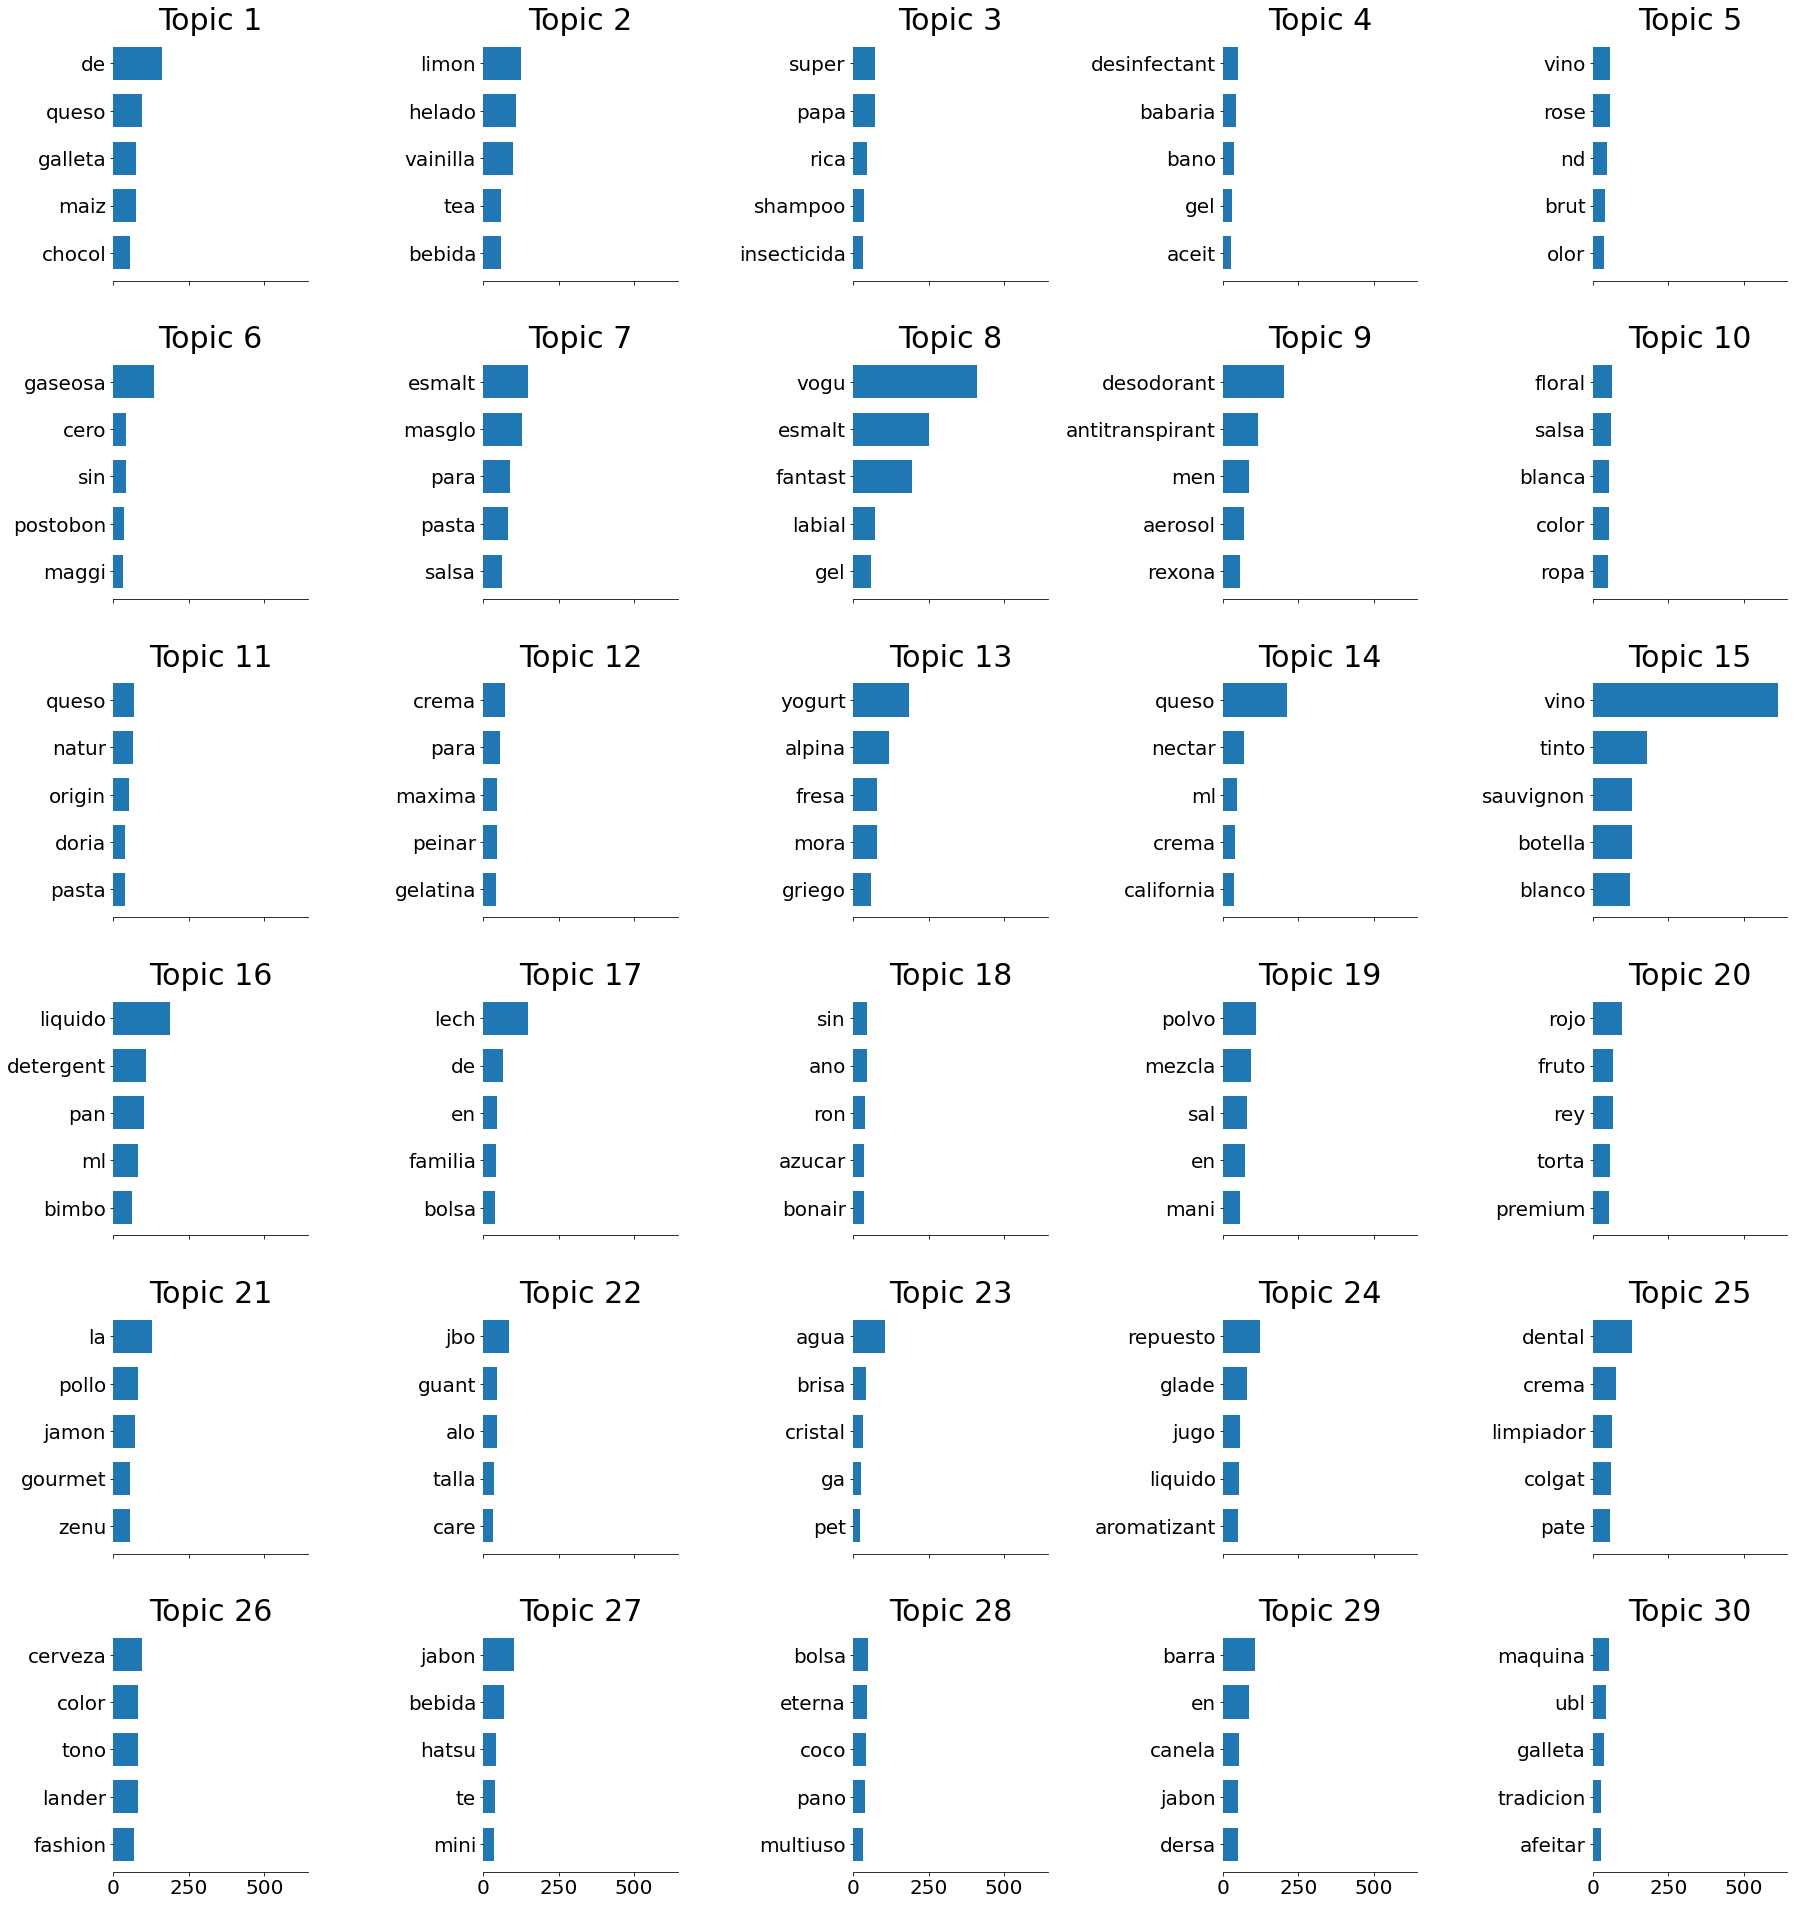

In [49]:
#LDA

lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X_cv)
#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 5
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

Tenemos entonces patrones de palabras que se usan juntas para describir nuestros alimentos.

**K-means clustering**

K-means clustering asigna puntos de datos en grupos discretos basados en su similitud o proximidad entre sí. Especificamos el número de conglomerados K ​​y el algoritmo asigna iterativamente cada observación a un conglomerado hasta que las observaciones de cada conglomerado estén lo más cerca posible de su media (o centroide).

**Número optimo de clusters**

Para identificar o hallar un valor optimo de K podemos usar el método del codo para probar diferentes valores de K y comparar las distancias de cada punto de datos desde sus centroides (la suma de los errores cuadrados, SSE).

Para comprender los tipos de alimentos en nuestro conjunto de datos, queremos equilibrar que los nombres de los alimentos sean lo más similares posible en un grupo (SSE bajo) y tener grupos significativos de más de 1 o 2 nombres de alimentos cada uno.

Hagamos esto con nuestra matriz de bolsa de palabras. Sabemos que hay 4142 palabras distintas en los nombres de nuestros alimentos, por lo que no puede haber más tipos de alimentos que ese.

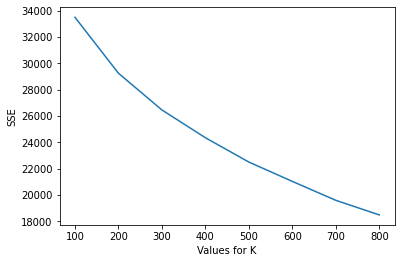

In [50]:

#Test increments of 100 clusters using elbow method
sse={}
for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_cv)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

Cuantos más grupos creamos, más bajo debería ser el SSE y más cerca está cada grupo de su centroide. Si extendiéramos el gráfico a K = 4500 (un grupo para cada nombre de alimento distinto), SSE sería 0.

El punto del codo parece estar en 200. La caída en SSE después de este punto comienza a hacerse cada vez más pequeña.

**Creando clusteres**

Creamos los cluster y probamos K = 200.

In [51]:
#Create 200 clusters
kmeans = KMeans(n_clusters=200)
kmeans.fit(X_cv)
result = pd.concat([text1,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X_cv)
result[['prod_name','cluster']]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,prod_name,cluster
0,Limpia tapicería en espuma Binner,51
1,Limpia tapicería y alfombras Binner,51
2,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,109
3,Aceite Bon Aire eléctrico perfume flores,51
4,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,116
...,...,...
10140,Jabón Carey surtido barra,195
10141,Jabón Corporal Nosotras Frutos Rojos,65
10142,Jabón Corporal Nosotras Karite Avena,179
10143,Jabón Corporal Nosotras Te Verde,21


Ahora, cada fila de nuestra matriz de bolsa de palabras se ha asignado a un grupo entre 0 y 199. 

**Etiquetas de clúster para mayor legibilidad**

Ahora le asignamos a nuestros grupos etiquetas legibles. Podemos hacer esto automáticamente recuperando los nombres de las columnas de la matriz que tienen un valor > 0 para cada fila en cada grupo. De esta manera podemos ver las palabras que tienen en común todos los nombres de alimentos en un grupo.

In [52]:
#Label each cluster with the word(s) that all of its food names have in common
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='prod_name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [53]:
print(result_labelled[['prod_name','cluster','label_y']])


                                               prod_name  ...             label_y
0                     Limpia tapicería en espuma Binner   ...                    
1                   Limpia tapicería y alfombras Binner   ...                    
2       Limpiador Dr. Beckmann alfombras 2en1 poder oxi   ...           limpiador
3              Aceite Bon Aire eléctrico perfume flores   ...                    
4      Ambientador Aire Varitas Bambú Bonaire 2 Repue...  ...  ambientador bonair
...                                                  ...  ...                 ...
10140                         Jabón Carey surtido barra   ...               barra
10141             Jabón Corporal Nosotras Frutos Rojos    ...                    
10142             Jabón Corporal Nosotras Karite Avena    ...               avena
10143                 Jabón Corporal Nosotras Te Verde    ...               jabon
10144                   Jabón Corporal Nosotras Yogurt    ...               jabon

[10145 rows x 3

Ahora podemos empezar a comprender qué representa cada uno de los grupos. Hay grupos que no tienen palabras comunes en los nombres de sus alimentos, por lo que permanecen sin etiquetar.

**Dimensionamiento del clúster**
Ahora que tenemos etiquetas de grupos, podemos ver el número de grupos etiquetados y su tamaño.

In [54]:
pd.pivot_table(result_labelled,index=['label_y'],values=['prod_name'],aggfunc='count').sort_values(['prod_name'],ascending=False).rename(columns={'label_y':'label', 'prod_name':'count of Name'})

,count of Name
label_y,
,3559
queso,260
vogu,218
chocol,214
vino,163
...,...
crema humectant ml piel vitu,4
gato live negro reserv sauvignon vino,4
brillo karit manteca vitu,4


En K = 200 con la matriz de bolsa de palabras, solo 3778 de los 10,145 nombres de alimentos no están etiquetados. En general, el 63% de los nombres de alimentos se agruparon en un grupo limpio. 


**Agregando una etiqueta adicional**

In [55]:
#Category
dt = pd.read_csv('datos2.csv',delimiter=';')
dt = df.dropna(subset=["Category"])
cat1 = dt['Category']

#Agregando tag category a results
result_temp = result_labelled
result_temp['category'] = cat1;
print(result_temp[['prod_name','label_y','category']])

                                               prod_name  ...          category
0                     Limpia tapicería en espuma Binner   ...     Aseo de hogar
1                   Limpia tapicería y alfombras Binner   ...     Aseo de hogar
2       Limpiador Dr. Beckmann alfombras 2en1 poder oxi   ...     Aseo de hogar
3              Aceite Bon Aire eléctrico perfume flores   ...     Aseo de hogar
4      Ambientador Aire Varitas Bambú Bonaire 2 Repue...  ...     Aseo de hogar
...                                                  ...  ...               ...
10140                         Jabón Carey surtido barra   ...  Cuidado Personal
10141             Jabón Corporal Nosotras Frutos Rojos    ...  Cuidado Personal
10142             Jabón Corporal Nosotras Karite Avena    ...  Cuidado Personal
10143                 Jabón Corporal Nosotras Te Verde    ...  Cuidado Personal
10144                   Jabón Corporal Nosotras Yogurt    ...  Cuidado Personal

[10145 rows x 3 columns]


**Visualizando los resultados**
Para la visualizacion optamos por un mapa de árbol que puede mostrar claramente las etiquetas y tamaños de nuestros grupos dentro de sus respectivas categorías de supermercados.

In [56]:
def visualizarBag():
 #Visualise sizes of supermarket categories (manually added to result_labelled) and clean clusters
 result_summary = pd.pivot_table(result_labelled,index=['label_y','category'],values=['prod_name'],aggfunc='count').reset_index().rename(columns={'prod_name':'count'})
 result_treemap = result_summary[(result_summary['label_y'] != '') & (result_summary['count'] > 1)]
 fig = px.treemap(result_treemap, path=['category','label_y'], values='count')
 fig.show();

**Resultados**
**Bolsa de palabras | K = 200 | 63% en clústeres limpios**

Evaluemos entonces nuestros grupos en K = 200. Para la mayoría de las categorías, tenemos algunos grupos grandes de palabras genéricas que describen en qué forma vienen los alimentos. Por ejemplo, "gaseosa", "agua", "tea", "vall", "te".

K = 200 terminó siendo bastante óptimo para la matriz de bolsa de palabras. En el analisis las pruebas de 100, 150, 250 y 300 pusieron menos nombres de alimentos en grupos limpios y no hicieron que las etiquetas de los grupos fueran más significativas.

Si la bolsa de palabras asigna (en su mayoría) el mismo peso a cada palabra en un vector, tiene sentido que la agrupación produzca grupos de las palabras más comunes como "la".


**Realizando pruebas para word level**

Creando clustes

In [57]:
#Create 200 clusters
kmeans = KMeans(n_clusters=200)
kmeans.fit(X_wtf)
result_wtf = pd.concat([text1,pd.DataFrame(X_wtf.toarray(),columns=vectorizer_wtf.get_feature_names())],axis=1)
result_wtf['cluster'] = kmeans.predict(X_wtf)
result_wtf[['prod_name','cluster']]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,prod_name,cluster
0,Limpia tapicería en espuma Binner,46
1,Limpia tapicería y alfombras Binner,46
2,Limpiador Dr. Beckmann alfombras 2en1 poder oxi,46
3,Aceite Bon Aire eléctrico perfume flores,4
4,Ambientador Aire Varitas Bambú Bonaire 2 Repue...,12
...,...,...
10140,Jabón Carey surtido barra,57
10141,Jabón Corporal Nosotras Frutos Rojos,134
10142,Jabón Corporal Nosotras Karite Avena,79
10143,Jabón Corporal Nosotras Te Verde,36


Etiquetas de clusters 

In [58]:
clusters_wtf = result_wtf['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='prod_name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table_wtf = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled_wtf = pd.merge(result,labels_table,on='cluster',how='left')

Dimensionamiento del cluster

In [59]:
pd.pivot_table(result_labelled_wtf,index=['label_y'],values=['prod_name'],aggfunc='count').sort_values(['prod_name'],ascending=False).rename(columns={'label_y':'label', 'prod_name':'count of Name'})

,count of Name
label_y,
,3559
queso,260
vogu,218
chocol,214
vino,163
...,...
crema humectant ml piel vitu,4
gato live negro reserv sauvignon vino,4
brillo karit manteca vitu,4


Agregando category

In [60]:
#Category
dt = pd.read_csv('datos2.csv',delimiter=';')
dt = df.dropna(subset=["Category"])
cat1 = dt['Category']

#Agregando tag category a results
result_labelled_wtf['category'] = cat1;

**TF-IDF (word of level) | K = 200 | 52% en clústeres limpios**

In [61]:
def lenguajeNatural():
 #Visualise sizes of supermarket categories (manually added to result_labelled) and clean clusters
 result_summary = pd.pivot_table(result_labelled_wtf,index=['label_y','category'],values=['prod_name'],aggfunc='count').reset_index().rename(columns={'prod_name':'count'})
 result_treemap = result_summary[(result_summary['label_y'] != '') & (result_summary['count'] > 1)]
 fig = px.treemap(result_treemap, path=['category','label_y'], values='count')
 fig.show();

TF-IDF a nivel de palabra generó resultados que tenían el sentido más humano para la mayoría de las categorías.

Ahora podemos ver los tipos de alimentos que aparecen en la mayoría de los grupos: 'leche', 'huevo', 'gaseosa postobon', 'helado popsi', 'maiz', 'labial vogu'.

Estas palabras pudieron agruparse ya que el algoritmo TF-IDF les dio más peso y a las palabras descriptivas más comunes menos peso.

**Conclusiones**

Hemos visto lo eficientes que son los clustering de NLP y K-means para organizar texto sin etiquetar.

Al igual que con cualquier modelo, no existe un modelo que se ajuste a todos los conjuntos de datos y casos de uso. Pero hay pasos prácticos a seguir y consideraciones para realizar pruebas. Ademas cada modelo de ajuste dependera del "filtro de categorzacion" que se busque. Pues con TF-IDF observamos como podimos obtener mejores resultados humanos, pero una mayor perdida de productos sin categorizar.  


# Implementecion con agente e integracion

Con las tareas ya implementadas y algunas de estas coordinando de manera conjunta. Ahora implementaremos el agente que se hizo en la primera iteracion y revisar que todo este bien comunicado entre cada una de las tareas.

El agente actua segun el entorno (una instruccion que recibe) las siguientes funciones representan las llamadas a esas funcionalidades.

Funcionalidad para imprimir la lista de productos.



In [62]:
def revisarListaProductos():
  print(pd.DataFrame.from_dict(dictProducts, orient='index').fillna(0))


Funcionalidad para agregar un producto 

In [63]:
def agregarUnProducto():
  print()
  nombre = input("Nombre Producto: ")
  precio = int(input("Precio de venta :"))  
  costo = int(input("Costo producto : "))
  precioAlm = int(input("Precio almacenamiento :"))
  cantidad = int(input("Cantidad de producto :"))
  
  #Agregar producto
  agregarProducto(nombre, precio, costo, precioAlm, cantidad)
  actualizar()

Funcionalidad que funciona para actualizar el inventario de productos. Se usa cuando se realiza un cambio en el inventario o sobre las ventas.

In [64]:
def actualizar():
  listaU = listUti(dictProducts)
  listaC = listCost(dictProducts)
  listaCoAlm = listCostAlm(dictProducts)
  listaAmo = listAmount(dictProducts)
  listaNam = listName(dictProducts)

Funcionalidad que lista el diccionario de las ventas

In [65]:
def revisarListaVentas():
  print(pd.DataFrame.from_dict(dictSales, orient='index').fillna(0))

Funcionalidad que usa el metodo simplex para calcular la cantidad optima de productos a comprar segun el presupuesto ingresado

In [66]:
def llamadaCalculoUtilidad():
  actualizar()
  print()
  print("Calculo de utilidad : Ingrese los siguientes campos")
  print()
  print('Productos optimos')
  print()
  presupuestoAl = int(input("Presupuesto Al : "))
  presupuesto = int(input("Presupuesto :"))
  outputSim = optimo3(presupuesto,presupuestoAl, listaU, listaC, listaCoAlm)

  #Ajusta la salida de la funcion
  for i,j in zip(outputSim.x,listaNam) :
    print(str(j) + ": = " + str(int(i)))


In [67]:
def revisarProducto():
  print()
  print("Ingrese el producto que desea revisar: ")
  producto = input("Nombre del producto: ")
  alertaProduct(producto)


Funcionalidad que se encarga de agregar una lista de ventas al diccionario de ventas. Esta funcion usa la llamada venta que registra una venta y registra en un dataset las ventas, para poder aplicar el algoritmo apriori.

In [68]:
def vender():
  productslist = []
  seller = input("Vendedor :")
  n = int(input("Numero de productos vendidos "))
  quantity = []
  for i in range(0,n):
    ele = input("Producto: ")
    productslist.append(ele)
    ele2 = int(input("Cantidad: "))
    quantity.append(ele2)
  llamadaVenta(seller,productslist,quantity,dictProducts)
  actualizar()

Funcionalidad que se encarga consultar la existencia de un producto

In [69]:
def consultar():
  try:
    producto =  input("Indique el producto: ")
    result = baseConocimiento("hayProducto(" + producto + ", Truth)")[0].get('Truth')
    print(result)
  except:
    print(baseConocimiento("hayProducto(" + producto + ", Truth)")[0])

Funcionalidad que se encarga de consultar si un producto esta en alerta y la cantidad que tiene.

In [70]:
def alertProduct():
  producto =  input("Indique el producto : ")
  result = baseConocimiento("alertaProducto(" + str(producto) + ", Truth)")[0].get('Truth')
  if(result == 'Yes'):
    print('Si')
    print('Cantidad: ' + str(dictProducts.get(str(producto)).get('cantidad')))
  else:
    print('No')
    print('Cantidad: ' + str(dictProducts.get(str('papas')).get('cantidad')))



Funcionalidad que se encarga la lista de productos en alerta a partir de la base de conocimiento.

In [71]:
def alertaProducts():
  result = baseConocimiento("alertaProducto(" + 'X' + ", Truth)")
  for i in result:
    name = i.get('X') 
    print(name + ': ' + i.get('Truth'))

Funcionalidad que se encarga de consultar si una venta se realizo o no, los parametros que recibe son:

*   Vendedor
*   Producto
*   Cantidad






In [72]:
def ventaProduct():
  vendedor =  input("Indique el vendedor : ")
  producto =  input("Indique el producto : ")
  cantidad =  input("Indique la cantidad del producto : ")

  result = baseConocimiento("vendio(" + str(vendedor) + "," + str(producto) + "," + str(cantidad) + ")")[0]
  if(result == 'Yes'):
    print('La venta si se realizo')
  else:
    print('la venta no es existe')

Funcionalidad que se encarga de consultar las ventas de un vendedor.

In [73]:
def ventasVendedor():
  vendedor =  input("Indique el vendedor : ")

  result = baseConocimiento("vendio(" + str(vendedor) + "," + 'X'+ "," + 'Y' + ")")
  print();
  print('Ventas: ');
  for i in result:
    print(str(i.get('X')) + ': '+str(i.get('Y')) )
    print()

Funcionalidad que se encarga de consultar los vendedores que merecen ser premiados teniendo en cuenta la cantidad de ventas, con las ventas >= 15.

In [74]:
def premiarVendedores():
  result = baseConocimiento("premiarVendedor(" + 'X' + ", Truth)")
  print('Vendedores a premiar (ventas >= 15): ')
  for i in result:
    if((str(i.get('Truth')) == 'Yes') and (str(i.get('X'))) != 'alertaproducto'):
      print(str(i.get('X'))) 


Funcionalidad que se encarga de consultar los vendedores que deben ser castigados teniendo en cuenta la cantidad de venta, con las ventas <= 5.

In [75]:
def castigarVendedores():
  result = baseConocimiento("castigarVendedor(" + 'X' + ", Truth)")
  print('Vendedores a castigar (ventas <= 5): ')
  for i in result:
    if((str(i.get('Truth')) == 'Yes') and (str(i.get('X'))) != 'alertaproducto'):
      print(str(i.get('X'))) 


Funcionalidad que se encarga de agregar un vendor al diccionario de ventas.

In [76]:
def agregarVendedor():
  vendedor =  input("Indique el nombre del vendedor : ")
  addSeller(vendedor)
  print('Vendedor agregado correctamente');
  actualizar()

Funcionalidad que nos permite invocar la visualización los clusters

In [77]:
def lenguajeNatural():
  visualizarBag()

In [78]:
def funcionApriori():
  te = TransactionEncoder()
  te_array= te.fit(dataset).transform(dataset)
  df = pd.DataFrame(te_array, columns=te.columns_)
  frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)
  rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
  print(rules_ap)


Define las funcionalidades que van a ser utilizadas.

In [79]:
Reglas = { '1' : revisarListaProductos,
          '2': revisarListaVentas,
          '3': agregarVendedor,
          '4' : agregarUnProducto,
          '5': llamadaCalculoUtilidad,
          '6': revisarProducto,
          '7' : calculo_prob_alerta,
          '8': vender,
          
          '9': consultar,
          '10':alertProduct,
          '11':alertaProducts,
          '12':ventaProduct,
          '13':ventasVendedor,
          '14':premiarVendedores,
          '15':castigarVendedores,
          '16':lenguajeNatural,
          '17':funcionApriori}

In [80]:
class AgenteReactivoSimple:

  def __init__(self, reglas):
    self.reglas = reglas
  
  def actuar(self, percepcion, accion_basica=''):
    if not percepcion:
      return accion_basica
    if percepcion in self.reglas.keys():
      return self.reglas[percepcion]()
    return accion_basica 


In [ ]:
hola_mundo = AgenteReactivoSimple(Reglas)
print('Listado de funciones:')
print()
print('1. lista de productos')
print('2. lista de ventas')
print('3. agregar vendedor')
print('4. agregar producto')
print('5. calculo utilidad ')
print('6. revisar producto Bayes')
print('7. verificar probabilidad venta de costoso')
print('8. agregar venta ')
print('9. consultar existencia de un producto')
print('10. consultar si producto en alerta ')
print('11. consultar productos en alerta')
print('12. consultar venta')
print('13. consultar ventas de vendedor')
print('14. consultar vendedores a premiar')
print('15. consutar vendedores a castigar')
print('16. simulacion clusters data')
print('17. aplicar algoritmo apriori a las ventas')
        
percepcion = input("Indique el numeral la regla: ")       
while percepcion:
  accion = hola_mundo.actuar(percepcion, 'No hay nada')
  
  percepcion = input("Indique la regla: ")

#El agente simula un entorno reuna la percepcion

Listado de funciones:

1. lista de productos
2. lista de ventas
3. agregar vendedor
4. agregar producto
5. calculo utilidad 
6. revisar producto Bayes
7. verificar probabilidad venta de costoso
8. agregar venta 
9. consultar existencia de un producto
10. consultar si producto en alerta 
11. consultar productos en alerta
12. consultar venta
13. consultar ventas de vendedor
14. consultar vendedores a premiar
15. consutar vendedores a castigar
16. simulacion clusters data
17. aplicar algoritmo apriori a las ventas
Indique el numeral la regla: 14
Vendedores a premiar (ventas >= 15): 
alberto
juan
pedro
tomas
tulio
Indique la regla: 13
Indique el vendedor : alberto

Ventas: 
papas: 13

cheetos: 5

ponky: 4

Indique la regla: 15
Vendedores a castigar (ventas <= 5): 
Indique la regla: 10
